(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.

    - Check how many rows and columns your CSV has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings.
    - Save the initial discussion of your findings into a single data quality report PDF file.                     

The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features.

# (0). Background for the given data analytics problem and dataset.

In [38]:
import pandas as pd
import datetime

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [39]:
missing_values = ["Missing", "Unknown"]
df = pd.read_csv('Covid19-cdc-20204693.csv', parse_dates=True, na_values = missing_values)

In [40]:
df['cdc_case_earliest_dt'] = df['cdc_case_earliest_dt'].astype('datetime64')
df['cdc_report_dt'] = df['cdc_report_dt'].astype('datetime64')
df['pos_spec_dt'] = df['pos_spec_dt'].astype('datetime64')
df['onset_dt'] = df['onset_dt'].astype('datetime64')
df['cdc_case_earliest_dt'] = (df['cdc_case_earliest_dt'] - datetime.datetime(2020, 1, 1)).dt.days
df['cdc_report_dt'] = (df['cdc_report_dt'] - datetime.datetime(2020, 1, 1)).dt.days
df['pos_spec_dt'] = (df['pos_spec_dt'] - datetime.datetime(2020, 1, 1)).dt.days
df['onset_dt'] = (df['onset_dt'] - datetime.datetime(2020, 1, 1)).dt.days

# (1). Prepare a data quality report for the CSV file.

### Check shape of CSV file

In [41]:
df.shape

(10000, 12)

### Print first and last 5 rows of CSV file

In [42]:
df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,343,NaN,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,NaN,No,NaN,No,NaN
1,147,147.0,NaN,147.0,Laboratory-confirmed case,Male,30 - 39 Years,NaN,No,NaN,No,NaN
2,327,330.0,NaN,327.0,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",No,NaN,No,NaN
3,238,238.0,NaN,NaN,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,NaN,No,NaN
4,283,293.0,NaN,283.0,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,No,Yes


In [43]:
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,76,381.0,77.0,76.0,Laboratory-confirmed case,Male,30 - 39 Years,NaN,No,NaN,No,No
9996,374,NaN,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,NaN,NaN,NaN,No,NaN
9997,111,113.0,109.0,111.0,Laboratory-confirmed case,Male,60 - 69 Years,NaN,No,NaN,No,NaN
9998,91,161.0,NaN,NaN,Laboratory-confirmed case,Male,60 - 69 Years,NaN,No,NaN,No,Yes
9999,352,352.0,352.0,NaN,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",NaN,NaN,No,NaN


### Convert features to appropriate datatypes

Based on examining the data in a spreadsheet program, 6 of the features are continuous and the rest categorical.

- *cdc_case_earliest_dt*, *cdc_report_dt*,*pos_spec_dt*, and *onset_dt* will be converted to *continuous* because there can be an infinite number of dates and they can be presented in a logical order. As a result, they were converted to integers/floats in the form of timedelta (days) from the 1st of January 2020.
- All other features will be converted to *categorical*, as they contain a finite set of values, each representing a different meaning, thus a different category.

In [44]:
df.dtypes

cdc_case_earliest_dt         int64
cdc_report_dt              float64
pos_spec_dt                float64
onset_dt                   float64
current_status              object
sex                         object
age_group                   object
race_ethnicity_combined     object
hosp_yn                     object
icu_yn                      object
death_yn                    object
medcond_yn                  object
dtype: object

In [45]:
object_columns = df.select_dtypes(['object']).columns

for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

cdc_case_earliest_dt          int64
cdc_report_dt               float64
pos_spec_dt                 float64
onset_dt                    float64
current_status             category
sex                        category
age_group                  category
race_ethnicity_combined    category
hosp_yn                    category
icu_yn                     category
death_yn                   category
medcond_yn                 category
dtype: object

### Check for duplicate row/columns

In [46]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep="first")].shape[0])

Number of duplicate (excluding first) rows in the table is:  695
Number of duplicate rows (including first) in the table is: 695


In [47]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep="first")].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### Result - Duplicate rows exist

- Rows - There is no primary key in the dataset to check if a case is included twice. Therefore I have compared them against all columns attributes. This acts like a primary key. This initially returned 1155 duplicate rows. To also include the rows that were matched I include "keep=False" parameter.
- Columns - There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.

#### Duplicate rows can be seen below

In [48]:
# Show duplicate row data that can be dropped
df[df.duplicated(keep="first")]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
180,363,NaN,NaN,NaN,Laboratory-confirmed case,Male,40 - 49 Years,NaN,NaN,NaN,No,NaN
273,372,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,NaN,No,NaN,No,NaN
320,362,362.0,362.0,NaN,Laboratory-confirmed case,Female,40 - 49 Years,NaN,NaN,NaN,No,NaN
489,369,NaN,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,NaN,NaN,NaN,No,NaN
520,352,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,NaN,NaN,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9939,377,NaN,NaN,NaN,Laboratory-confirmed case,Male,60 - 69 Years,NaN,NaN,NaN,No,NaN
9949,367,NaN,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,NaN,NaN,NaN,No,NaN
9952,363,NaN,NaN,NaN,Laboratory-confirmed case,Male,50 - 59 Years,NaN,No,NaN,No,NaN
9980,193,NaN,NaN,NaN,Laboratory-confirmed case,Male,40 - 49 Years,NaN,NaN,NaN,No,NaN


In [49]:
# Check for duplicate rows and columns in this toy df that atually has duplicated rows and columns, 
#to check the duplicate checks work correctly
toy_duplicates_df = df[df.duplicated(keep="first")].iloc[:,0:5]
toy_duplicates_df

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status
180,363,NaN,NaN,NaN,Laboratory-confirmed case
273,372,NaN,NaN,NaN,Laboratory-confirmed case
320,362,362.0,362.0,NaN,Laboratory-confirmed case
489,369,NaN,NaN,NaN,Laboratory-confirmed case
520,352,NaN,NaN,NaN,Laboratory-confirmed case
...,...,...,...,...,...
9939,377,NaN,NaN,NaN,Laboratory-confirmed case
9949,367,NaN,NaN,NaN,Laboratory-confirmed case
9952,363,NaN,NaN,NaN,Laboratory-confirmed case
9980,193,NaN,NaN,NaN,Laboratory-confirmed case


In [50]:
print('Number of duplicate (excluding first) rows in the toy table is: ', toy_duplicates_df.duplicated().sum())
print('Number of duplicate rows (including first) in the toy table is:', toy_duplicates_df[toy_duplicates_df.duplicated(keep="first")].shape[0])

#transpose the toy df
toy_duplicates_dfT = toy_duplicates_df.T
print("\nNumber of duplicate (excluding first) columns in the toy table is: ", toy_duplicates_dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the toy table is: ",  toy_duplicates_dfT[toy_duplicates_dfT.duplicated(keep="first")].shape[0])


Number of duplicate (excluding first) rows in the toy table is:  510
Number of duplicate rows (including first) in the toy table is: 510

Number of duplicate (excluding first) columns in the toy table is:  0
Number of duplicate (including first) columns in the toy table is:  0


#### The duplicate checks seems to be working as expected.

Duplicate rows will now be dropped from the original data frame as they provide minimal information.

In [51]:
df = df.drop_duplicates(keep="first")
# get duplicated row data. Use "keep=False" to mark all duplicates as true
print('Duplicate remaining rows:', df[df.duplicated(keep="first")].shape[0])

Duplicate remaining rows: 0


### Check for constant columns

In [52]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9305,2,Laboratory-confirmed case,8637
sex,9210,2,Female,4802
age_group,9290,9,20 - 29 Years,1656
race_ethnicity_combined,5775,7,"White, Non-Hispanic",3275
hosp_yn,5754,2,No,5115
icu_yn,1056,2,No,991
death_yn,9305,2,No,8978
medcond_yn,1768,2,No,970


*Categorical Data* - Reviewing the categorical data below we can see all unique values > 1 (cardinality > 1). This means there are no constant categorical features.
- *current_status* has 2 unique values
- *sex* has 4 unique values
- *age_group* has 7 unique values
- *race_ethnicity_combined* has 9 unique values
- *hosp_yn* has 4 unique values
- *icu_yn* has 4 unique values
- *death_yn* has 2 unique values
- *medcond_yn* has 4 unique values
- *Weekday Name* has 7 unique values

In [53]:
# Print table with continuous statistics
df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
cdc_case_earliest_dt,9305.0,273.783235,86.347600,4.0,203.0,306.0,345.0,381.0
cdc_report_dt,7579.0,288.814751,81.524999,51.0,228.0,315.0,354.0,395.0
pos_spec_dt,2781.0,260.674218,89.102921,72.0,187.0,286.0,335.0,387.0
onset_dt,5022.0,263.089606,85.900145,51.0,194.0,290.0,334.0,395.0


**Continuous Data** - Reviewing the continuous data below we can see all have a non zero standard deviation.  
- This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
- Result - No constant columns

### Check for Null Values

In [54]:
df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              1726
pos_spec_dt                6524
onset_dt                   4283
current_status                0
sex                          95
age_group                    15
race_ethnicity_combined    3530
hosp_yn                    3551
icu_yn                     8249
death_yn                      0
medcond_yn                 7537
dtype: int64

In [55]:
features_missing_table  = 100 * (df.isnull().sum()/df.shape[0])
features_missing_table = pd.DataFrame(features_missing_table, columns=['%missing'])
features_missing_table

,%missing
cdc_case_earliest_dt,0.000000
cdc_report_dt,18.549167
pos_spec_dt,70.112843
onset_dt,46.029017
current_status,0.000000
sex,1.020956
age_group,0.161204
race_ethnicity_combined,37.936593
hosp_yn,38.162278
icu_yn,88.651263


- Result - Null values for *cdc_report_dt*, *pos_spec_dt*, and *onset_dt*. For categorical features, null data was categorised as *missing* and *unknown*. While *unknown* is not a mistake in the form itself, it does not provide valuable data. Therefore, these two categories will be combined to just display *missing*. 

In [56]:
df.shape

(9305, 12)

### Check for Irregular cardinalities & permitted values

In [57]:
continuous_features = df.select_dtypes(['float64', 'int64']).columns

In [58]:
categorical_features = df.select_dtypes(['category']).columns

In [59]:
print("Unique values for:\ncurrent_status:", pd.unique(df["current_status"].ravel()))
print("sex:", pd.unique(df["sex"].ravel()))
print("age_group:", pd.unique(df["age_group"].ravel()))
print("race_ethnicity_combined:", pd.unique(df["race_ethnicity_combined"].ravel()))
print("hosp_yn:", pd.unique(df["hosp_yn"].ravel()))
print("icu_yn:", pd.unique(df["icu_yn"].ravel()))
print("death_yn:", pd.unique(df["death_yn"].ravel()))
print("medcond_yn:", pd.unique(df["medcond_yn"].ravel()))

Unique values for:
current_status: ['Laboratory-confirmed case', 'Probable Case']
Categories (2, object): ['Laboratory-confirmed case', 'Probable Case']
sex: ['Male', 'Female', NaN]
Categories (2, object): ['Male', 'Female']
age_group: ['30 - 39 Years', '10 - 19 Years', '80+ Years', '40 - 49 Years', '20 - 29 Years', '70 - 79 Years', '50 - 59 Years', '60 - 69 Years', '0 - 9 Years', NaN]
Categories (9, object): ['30 - 39 Years', '10 - 19 Years', '80+ Years', '40 - 49 Years', ..., '70 - 79 Years', '50 - 59 Years', '60 - 69 Years', '0 - 9 Years']
race_ethnicity_combined: [NaN, 'White, Non-Hispanic', 'Hispanic/Latino', 'Black, Non-Hispanic', 'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic', 'American Indian/Alaska Native, Non-Hispanic', 'Native Hawaiian/Other Pacific Islander, Non-H...]
Categories (7, object): ['White, Non-Hispanic', 'Hispanic/Latino', 'Black, Non-Hispanic', 'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic', 'American Indian/Alaska Native, Non-Hispanic', 'Native Ha

## Descriptive Statistics: Continuous Features
Of the continuous features, we already know:
-  The type of data for each

<br>
We now supplement this information with the following

-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

In [60]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")


cdc_case_earliest_dt
----------

Range cdc_case_earliest_dt is:  377
----------
Value  Number of Instances
362    99
371    92
363    88
370    86
369    86
348    84
357    83
356    82
341    81
372    81
350    79
345    76
373    75
364    74
322    73
Name: cdc_case_earliest_dt, dtype: int64 



cdc_report_dt
----------

Range cdc_report_dt is:  344.0
----------
Value  Number of Instances
161.0    148
392.0    104
363.0     87
329.0     76
348.0     72
386.0     69
328.0     69
341.0     63
373.0     63
321.0     63
324.0     62
379.0     59
356.0     58
322.0     58
377.0     58
Name: cdc_report_dt, dtype: int64 



pos_spec_dt
----------

Range pos_spec_dt is:  315.0
----------
Value  Number of Instances
362.0    32
320.0    29
321.0    29
323.0    27
341.0    27
370.0    26
317.0    26
334.0    26
376.0    25
363.0    25
309.0    24
322.0    24
357.0    24
335.0    23
356.0    23
Name: pos_spec_dt, dtype: int64 



onset_dt
----------

Range onset_dt is:  344.0
----------
Value

In [61]:
# Display the cardinality of each continuous feature

features_cardinality = list(df[continuous_features].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

cdc_case_earliest_dt                 320
cdc_report_dt                        328
pos_spec_dt                          309
onset_dt                             322


### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

In [62]:
test_1 = df[['hosp_yn', 'icu_yn']][(df['hosp_yn'] == 'No') &  (df['icu_yn'] == 'Yes')]
print("Number of rows failing the test: ", test_1.shape[0])
test_1

Number of rows failing the test:  1


,hosp_yn,icu_yn
5083,No,Yes


In [63]:
test_2 = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt']][df['cdc_case_earliest_dt'] > df['cdc_report_dt']]
print("Number of rows failing the test: ", test_2.shape[0])
test_2

Number of rows failing the test:  32


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt
133,220,170.0,170.0,220.0
930,221,219.0,219.0,221.0
1188,306,302.0,302.0,306.0
2164,177,175.0,175.0,177.0
2389,220,218.0,218.0,220.0
2668,221,220.0,220.0,221.0
2939,344,343.0,343.0,344.0
2956,177,176.0,176.0,177.0
3904,294,293.0,293.0,294.0
4092,349,348.0,348.0,349.0


In [64]:
test_3 = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt']][df['cdc_case_earliest_dt'] > df['pos_spec_dt']]
print("Number of rows failing the test: ", test_3.shape[0])
test_3

Number of rows failing the test:  89


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt
133,220,170.0,170.0,220.0
478,196,232.0,195.0,196.0
609,268,268.0,266.0,271.0
930,221,219.0,219.0,221.0
1000,341,345.0,338.0,341.0
...,...,...,...,...
9658,138,137.0,137.0,138.0
9772,347,346.0,346.0,347.0
9843,311,311.0,309.0,366.0
9873,140,198.0,138.0,140.0


In [65]:
test_4 = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt']][df['cdc_case_earliest_dt'] > df['onset_dt']]
print("Number of rows failing the test: ", test_4.shape[0])
test_4

Number of rows failing the test:  0


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt


### - Save updated/cleaned data frame to a new csv file.

In [66]:
# Write the dataframe to a csv file
df.to_csv('covid19-cdc_cleaned.csv')

### - Prepare a table with descriptive statistics for all the continuous features.

In [67]:
# Print table with descriptive statistics for all the continuous features
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
cdc_case_earliest_dt,9305.0,273.783235,86.347600,4.0,203.0,306.0,345.0,381.0
cdc_report_dt,7579.0,288.814751,81.524999,51.0,228.0,315.0,354.0,395.0
pos_spec_dt,2781.0,260.674218,89.102921,72.0,187.0,286.0,335.0,387.0
onset_dt,5022.0,263.089606,85.900145,51.0,194.0,290.0,334.0,395.0


In [68]:
continuous_features_table = df[continuous_features].describe().T

continuous_features_mean = df[continuous_features].mean()
continuous_features_mean_table = pd.DataFrame(continuous_features_mean, columns=['mean'])

continuous_features_missing = 100 * (df[continuous_features].isnull().sum()/df.shape[0])
continuous_features_missing_table = pd.DataFrame(continuous_features_missing, columns=['%missing'])

continuous_features_card = df[continuous_features].nunique()
continuous_features_card_table = pd.DataFrame(continuous_features_card, columns=['card'])

continuous_features_data_quality_report_table = pd.concat([continuous_features_table, continuous_features_missing_table, continuous_features_card_table], axis=1)

continuous_features_data_quality_report_table

,count,mean,std,min,25%,50%,75%,max,%missing,card
cdc_case_earliest_dt,9305.0,273.783235,86.347600,4.0,203.0,306.0,345.0,381.0,0.000000,320
cdc_report_dt,7579.0,288.814751,81.524999,51.0,228.0,315.0,354.0,395.0,18.549167,327
pos_spec_dt,2781.0,260.674218,89.102921,72.0,187.0,286.0,335.0,387.0,70.112843,308
onset_dt,5022.0,263.089606,85.900145,51.0,194.0,290.0,334.0,395.0,46.029017,321


### - Save descriptive statistics for all the continuous features to csv for data quality report

In [69]:
continuous_features_data_quality_report_table.to_csv("covid19-cdc-DataQualityReport-ContinuousFeatures-Table.csv", index_label='Feature')

### - Prepare a table with descriptive statistics for all the categorical features.

In [70]:
categorical_features_table = df[categorical_features].describe().T

categorical_features_missing = 100 * (df[categorical_features].isnull().sum()/df.shape[0])
categorical_features_missing_table = pd.DataFrame(categorical_features_missing, columns=['%missing'])

categorical_features_card = df[categorical_features].nunique()
categorical_features_card_table = pd.DataFrame(categorical_features_card, columns=['card'])

categorical_features_data_quality_report_table = pd.concat([categorical_features_table, categorical_features_missing_table, categorical_features_card_table], axis=1)

categorical_features_data_quality_report_table

,count,unique,top,freq,%missing,card
current_status,9305,2,Laboratory-confirmed case,8637,0.000000,2
sex,9210,2,Female,4802,1.020956,2
age_group,9290,9,20 - 29 Years,1656,0.161204,9
race_ethnicity_combined,5775,7,"White, Non-Hispanic",3275,37.936593,7
hosp_yn,5754,2,No,5115,38.162278,2
icu_yn,1056,2,No,991,88.651263,2
death_yn,9305,2,No,8978,0.000000,2
medcond_yn,1768,2,No,970,80.999463,2


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [71]:
categorical_features_data_quality_report_table.to_csv("covid19-cdc-DataQualityReport-CategoricalFeatures-Table.csv", index_label='Feature')

### - Plot histograms summary sheet for all the continuous features.

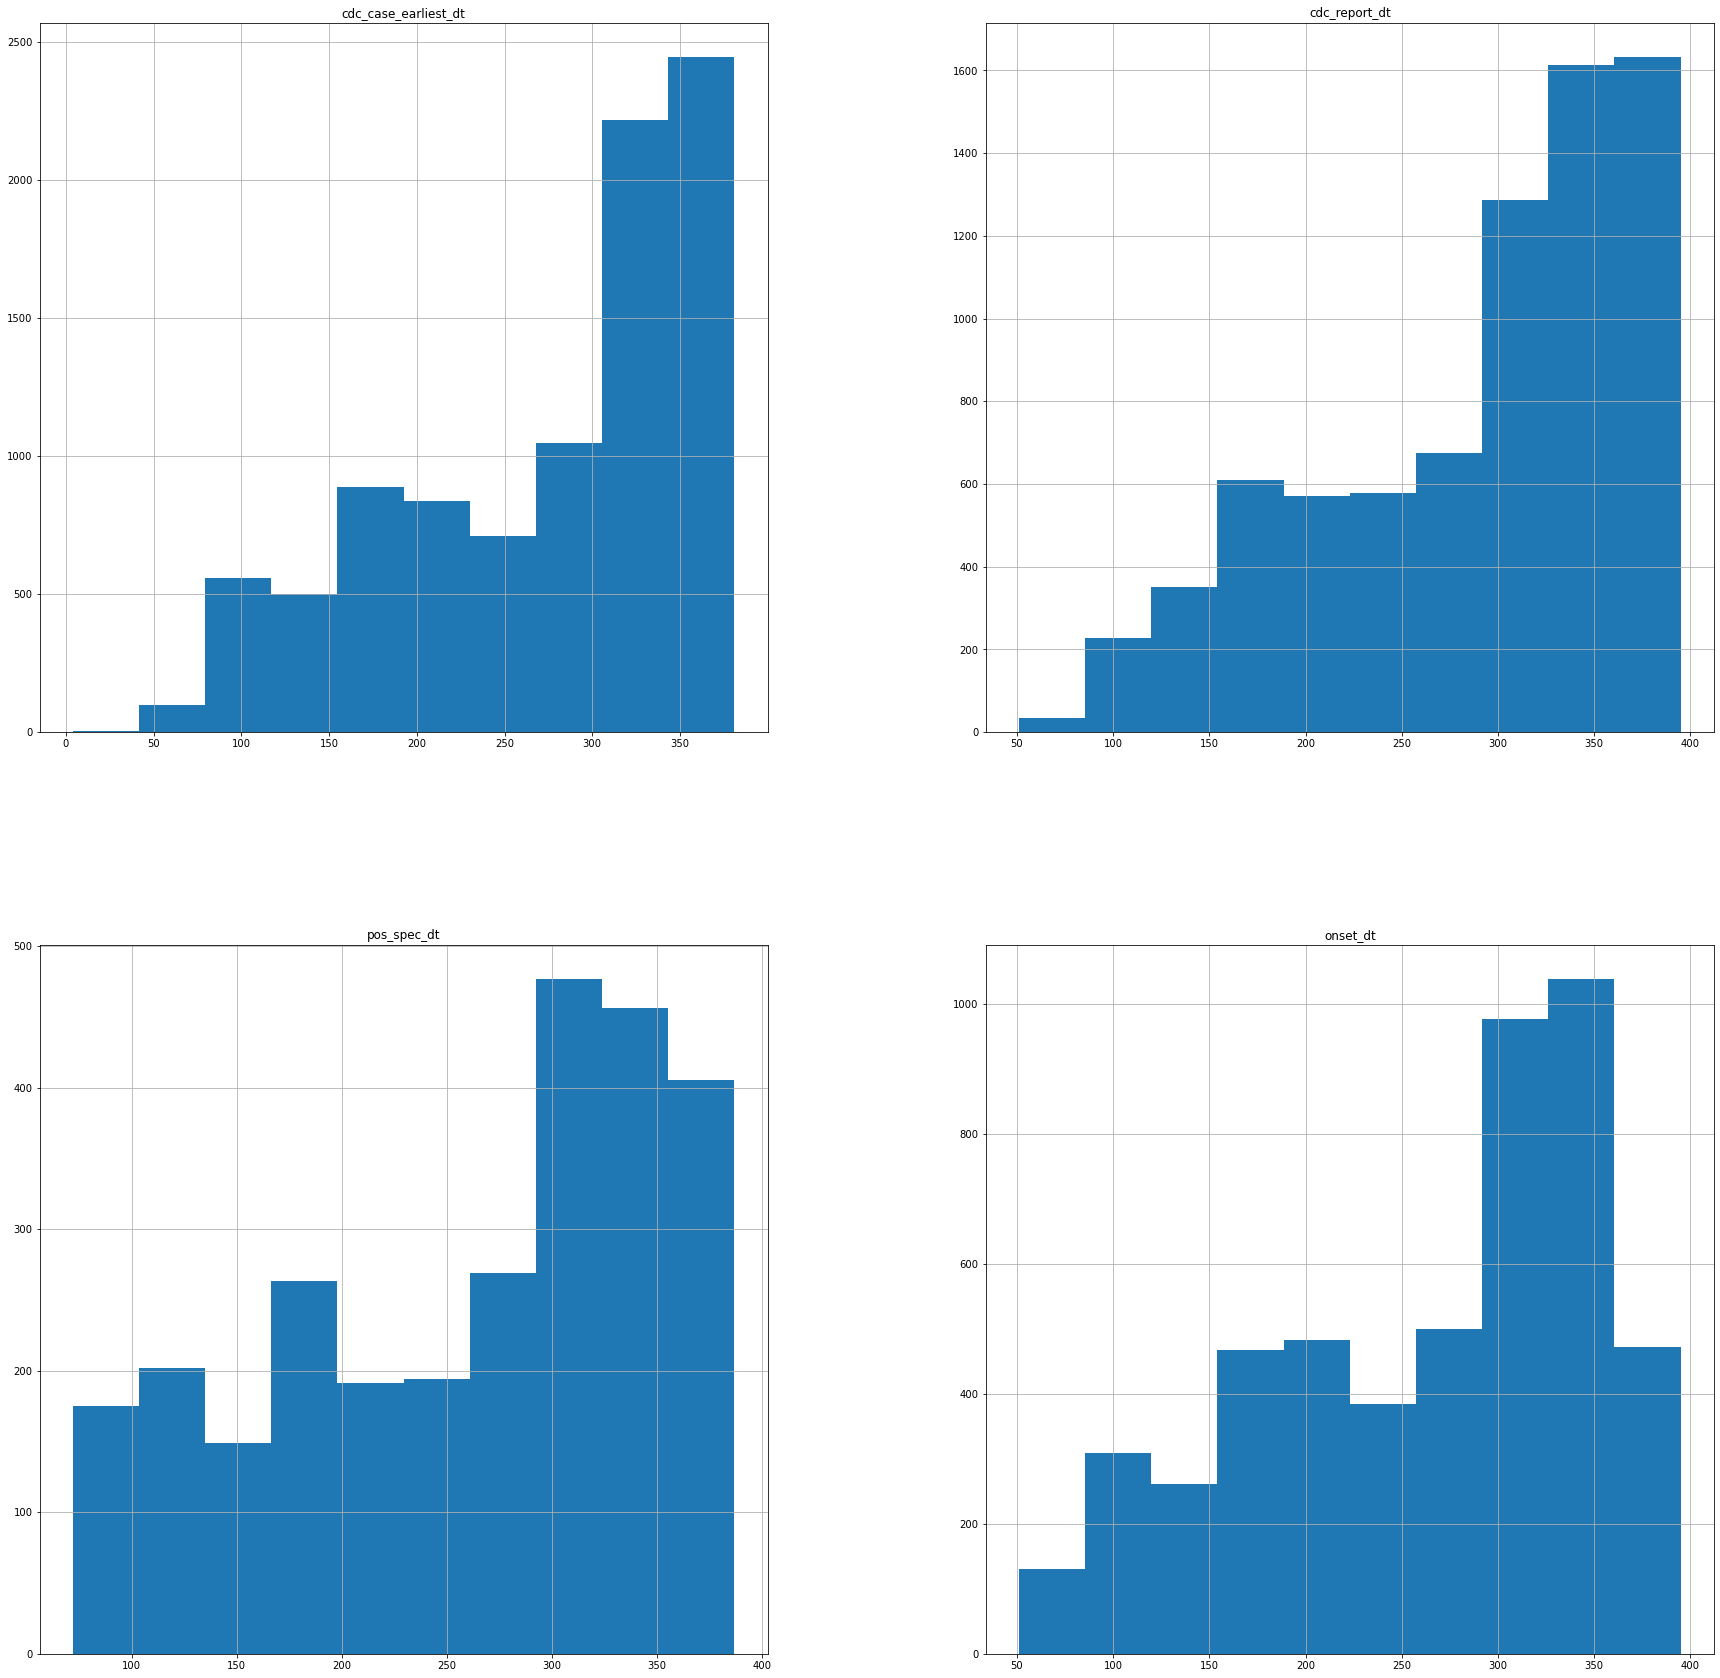

In [72]:
# Plot a histogram summary sheet of the continuous features and save in a png file
df[continuous_features].hist(layout=(2, 2), figsize=(30,30), bins=10)
plt.savefig('continuous_histograms_summary_1-1.pdf')

### - Plot histograms individual sheet for all the continuous features.

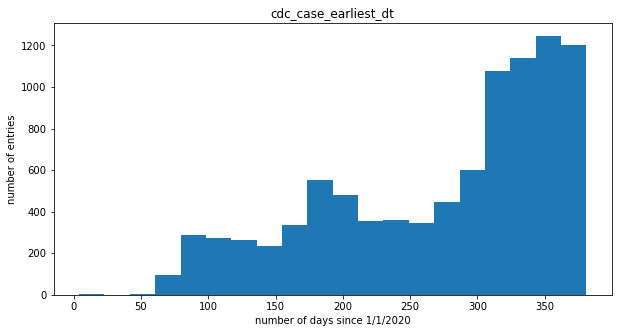

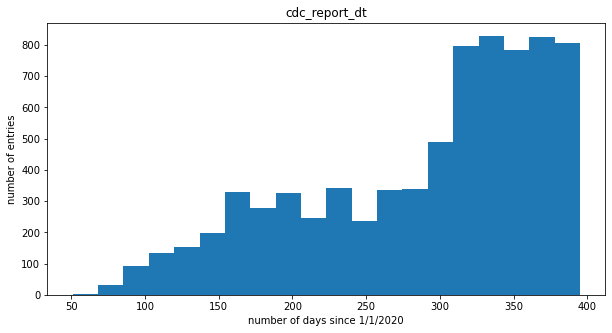

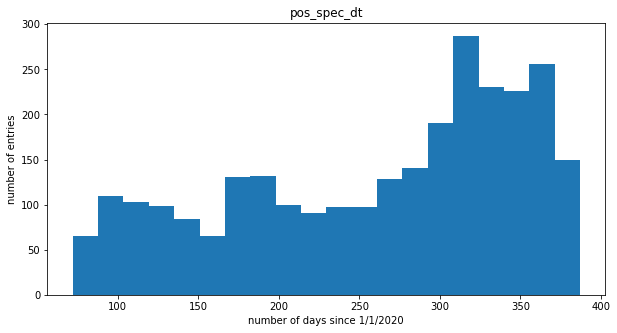

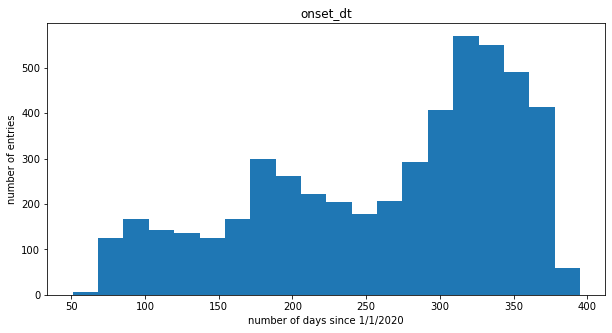

In [73]:
with PdfPages('continuous_histograms_1-1.pdf') as pp:
        for feature in continuous_features:
                f = df[feature].plot(kind='hist', figsize=(10,5), bins=20)
                plt.title(feature)
                plt.ylabel('number of entries')
                plt.xlabel('number of days since 1/1/2020')
                pp.savefig(f.get_figure())
                plt.show()    

### - Plot box plots summary sheet for all the continuous features.

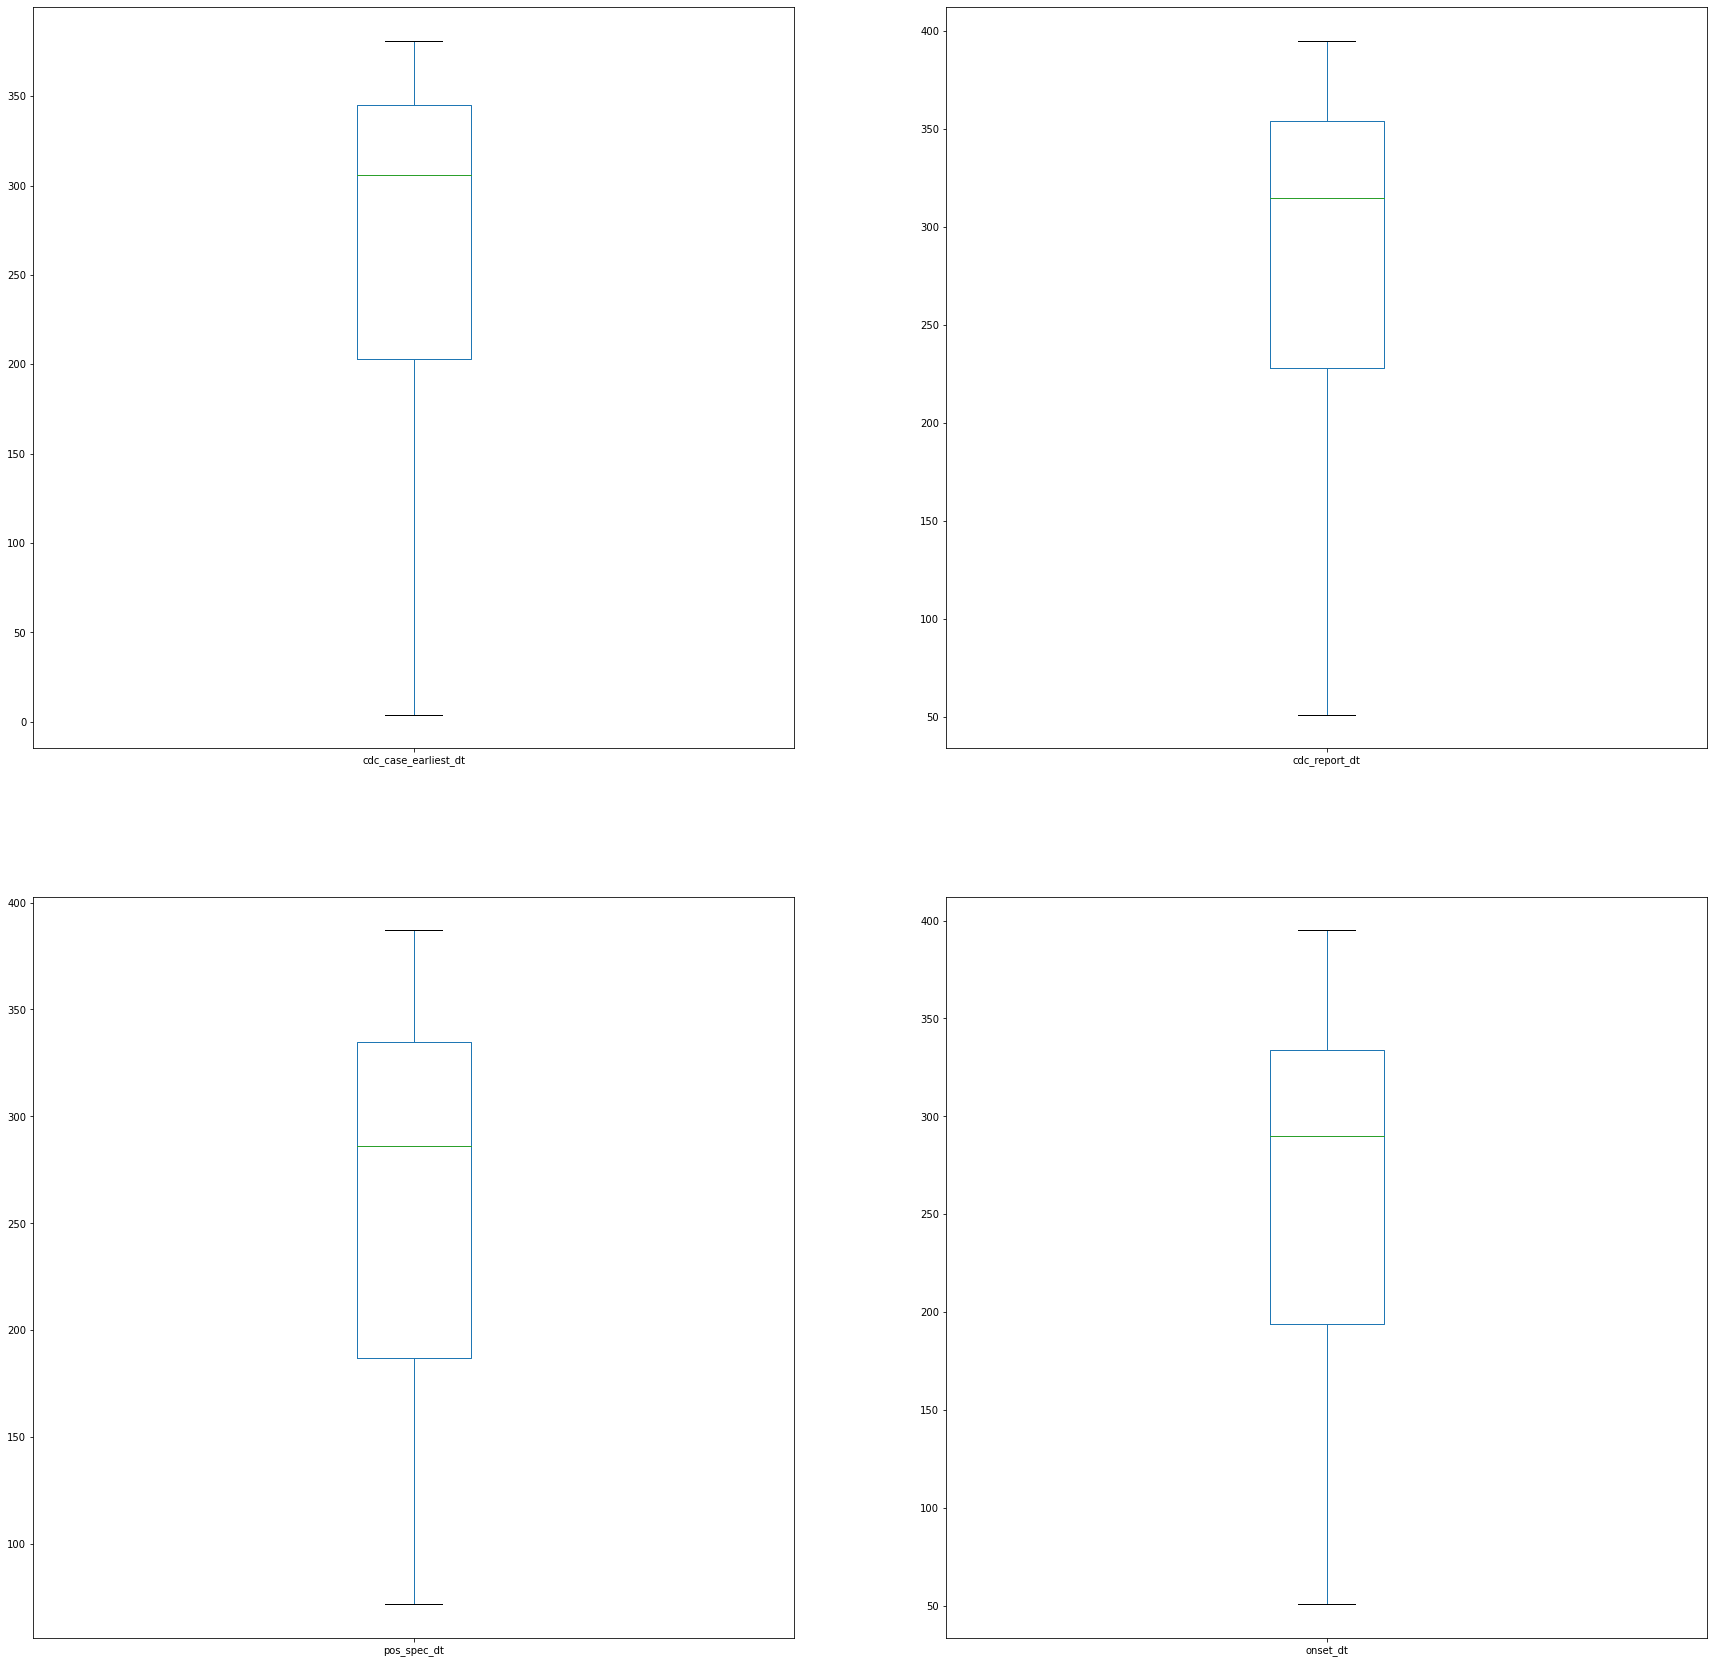

In [74]:
df[continuous_features].plot(kind='box', subplots=True, figsize=(30,30), layout=(2,2), sharex=False, sharey=False)
plt.savefig('continuous_boxplots_summary1-1.pdf')

### - Plot box plots individual sheet for all the continuous features.

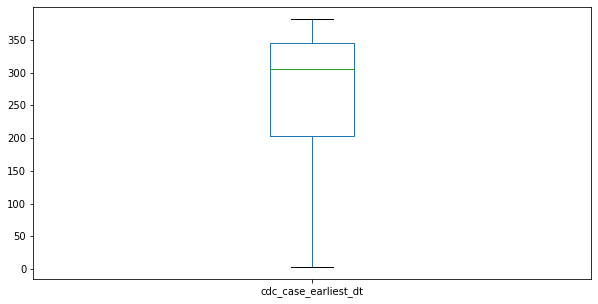

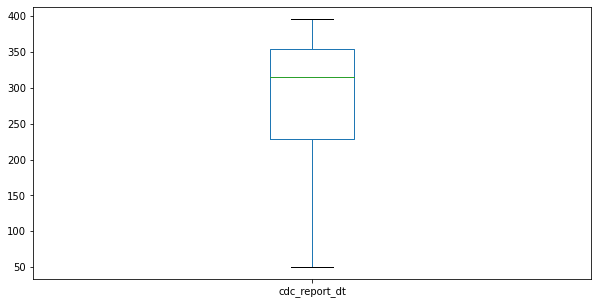

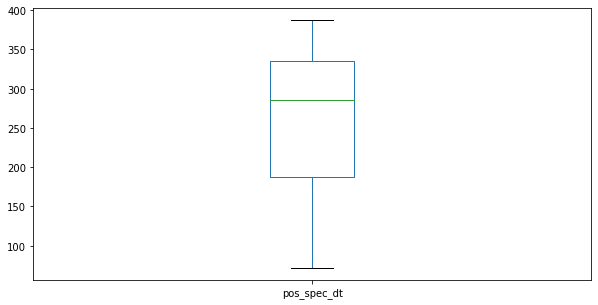

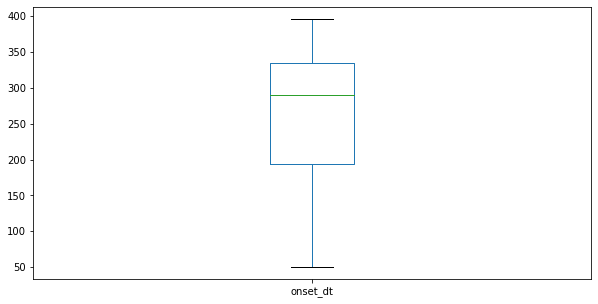

In [75]:
# Plot box plots for all the continuous features and save in a PDF file
with PdfPages('continuous_boxplots_1-1.pdf') as pp:
    for col in continuous_features:
        f = df[col].plot(kind='box', figsize=(10,5))
        pp.savefig(f.get_figure())
        plt.show()    

### - Plot bar plots summary sheet for all the categorical features.

### - Plot bar plots individual sheet for all the categorical features.


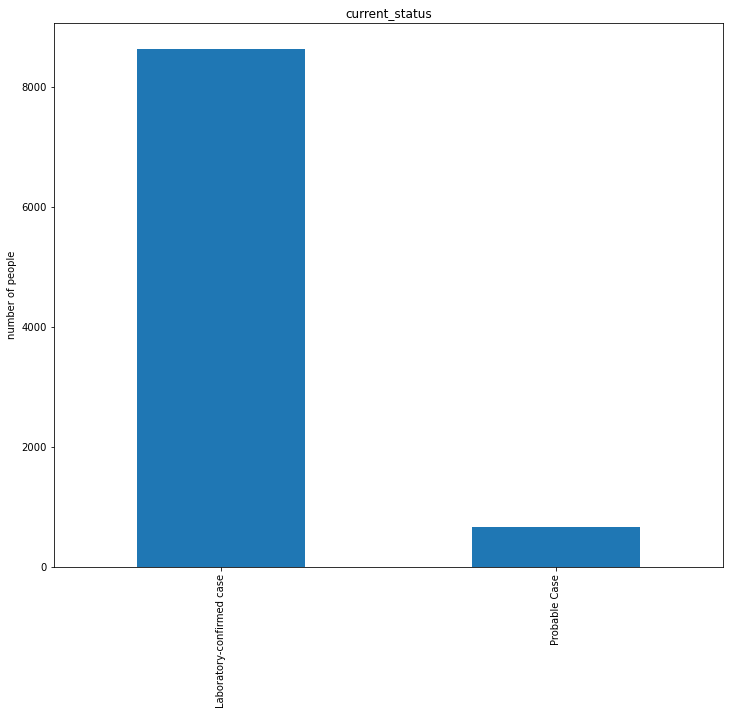

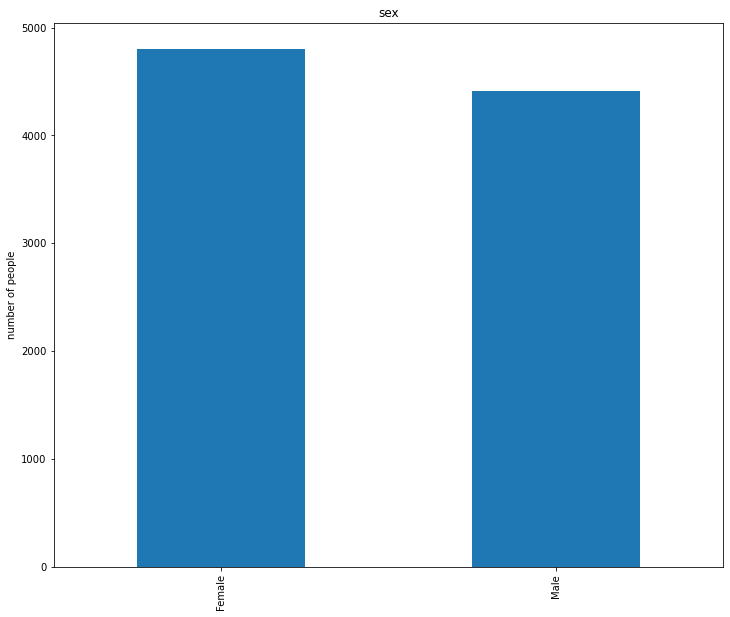

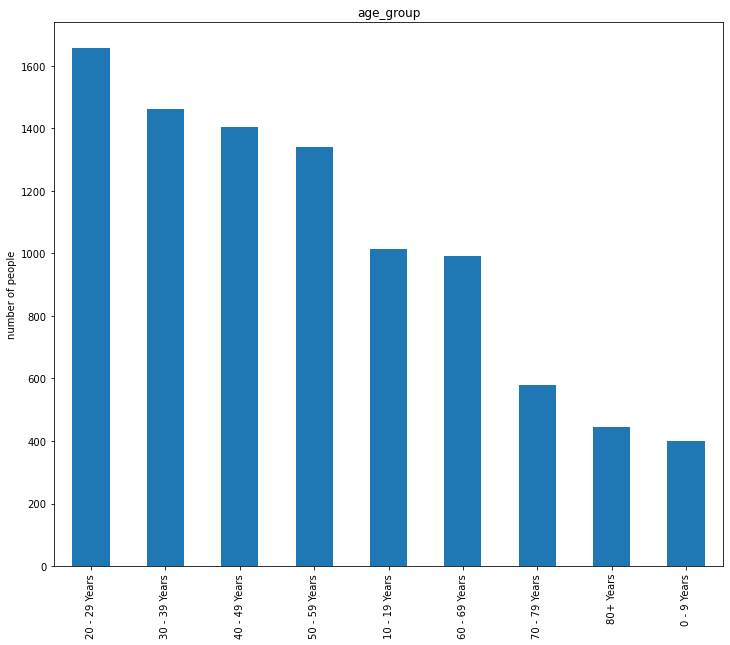

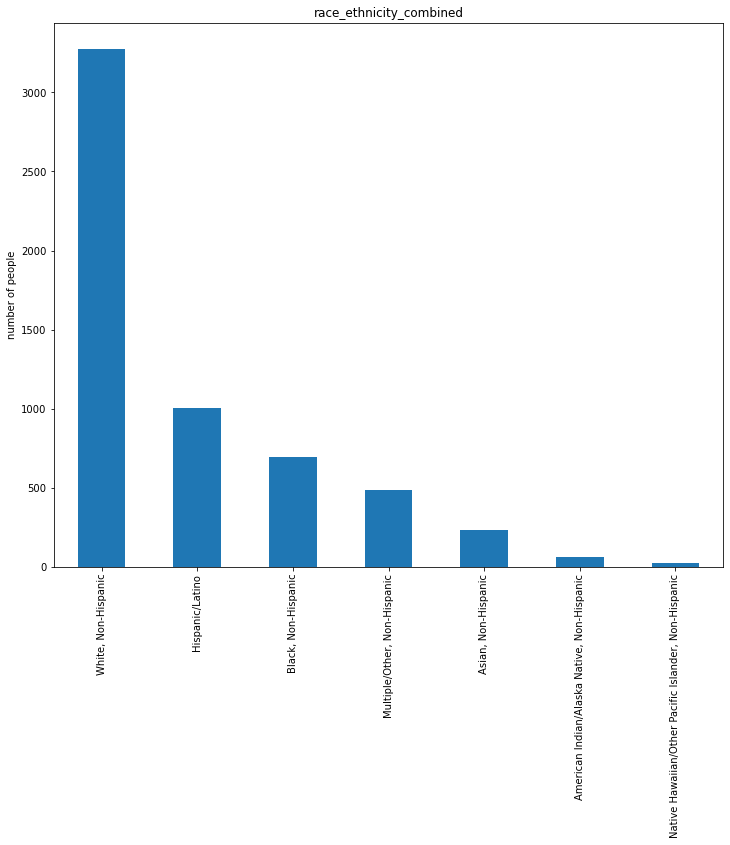

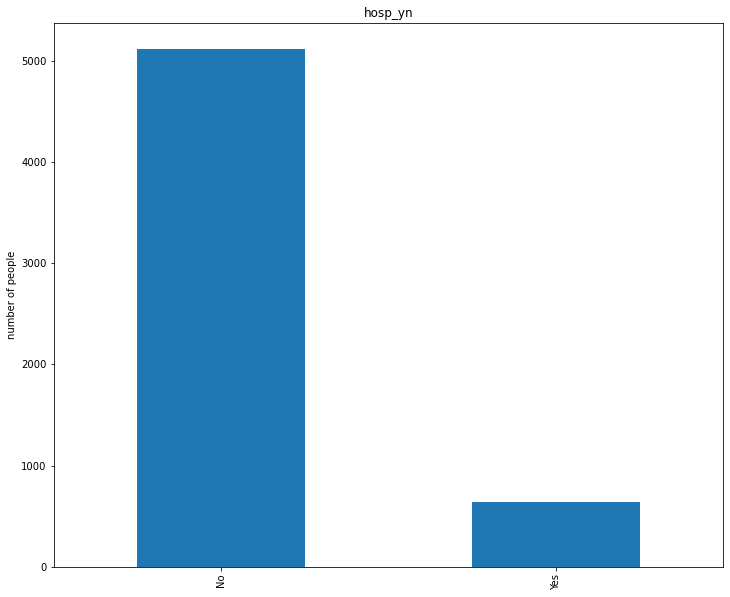

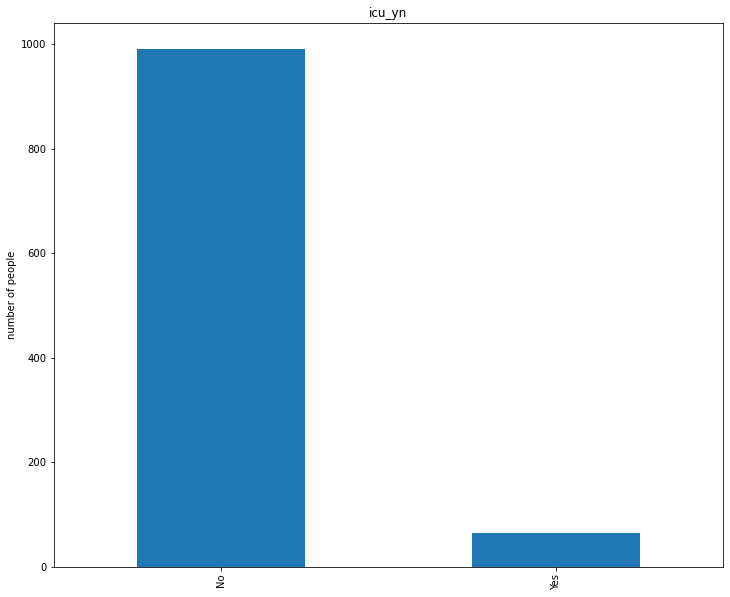

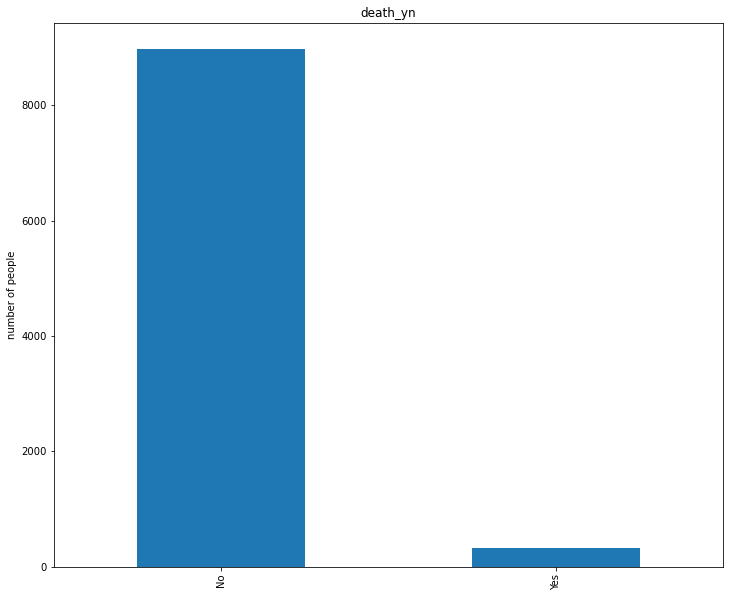

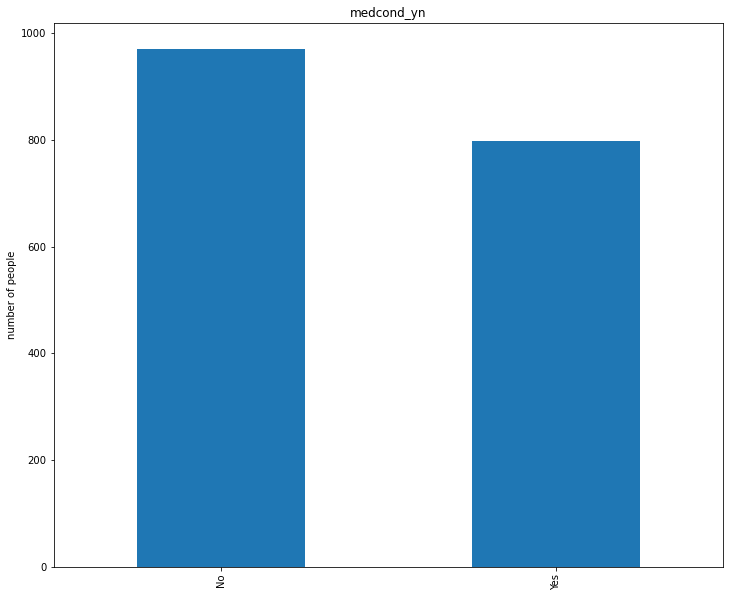

In [76]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for col in categorical_features:
        f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
        plt.title(col)
        plt.ylabel('number of people')
        pp.savefig(f.get_figure())
        plt.show()

# Initial Findings

### Initial findings and detailed discussion for each feature can be found in the accompanying *Data_Quality_Report_Initial_Findings.pdf* file

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

- There is a significant amount of missing data *(80%)* for *medcond_yn*.
- There is a significant amount of missing data *(88%)* for *icu_yn*.
- There is a significant amount of missing data *(68%)* for *pos_spec_dt*.
- *cdc_report_dt* is described in the documentation as depreciated, and to use *cdc_case_earliest_dt* instead for time series analysis. Thus, it lacks in informational quality and significantly overlaps in its function with *cdc_case_earliest_dt*. 
- There is an instance where an individual was in ICU *(icu_yn)* without being in hospital *(hosp_yn)*. It is a logical error.
- There are a number of instances where *cdc_report_dt*, *pos_spec_dt*, or *onset_dt* precede *cdc_case_earliest_dt*, even though this was described as the earliest record of the individual.
- There was a significant number *(1155)* of rows missing a majority of their data, to the extent that they lacked usable information and needed to be cleaned.
- Categorical data had both *Missing* and *Unknown* as feature categories. *Unknown* was grouped with *Missing* as it provided a similar lack of information. These values were subsequently changed to null values so as to not clutter the data.
- Since the continuous features were in *datetime* format, they could not be easily compared and averaged. Therefore they were turned into *timedelta* from the 1st of January 2020.

### - Propose solutions to deal with the problems identified. 

- Missing data in continuous features will be imputed with their corresponding *cdc_case_earliest_dt*. This is because *cdc_earliest_date* is closely correlated with its peers.
- Although the correlation of *cdc_report_dt* has a lower correlation to *cdc_case_earliest_dt*, which means it could provide some unique data, it will be dropped due to its depreciated state.
- Drop row where an individual was in ICU *(icu_yn)* without being in hospital *(hosp_yn)*. It is a logical error.
- Drop rows where other dates precede *cdc_case_earliest_dt*.
- Don't impute missing categorical data with a median as it will affect the existing data set negatively. Leave missing data as a single variable and ignore it in further calculations.

In [77]:
categorical_features_data_quality_report_table

,count,unique,top,freq,%missing,card
current_status,9305,2,Laboratory-confirmed case,8637,0.000000,2
sex,9210,2,Female,4802,1.020956,2
age_group,9290,9,20 - 29 Years,1656,0.161204,9
race_ethnicity_combined,5775,7,"White, Non-Hispanic",3275,37.936593,7
hosp_yn,5754,2,No,5115,38.162278,2
icu_yn,1056,2,No,991,88.651263,2
death_yn,9305,2,No,8978,0.000000,2
medcond_yn,1768,2,No,970,80.999463,2


In [78]:
continuous_features_data_quality_report_table


,count,mean,std,min,25%,50%,75%,max,%missing,card
cdc_case_earliest_dt,9305.0,273.783235,86.347600,4.0,203.0,306.0,345.0,381.0,0.000000,320
cdc_report_dt,7579.0,288.814751,81.524999,51.0,228.0,315.0,354.0,395.0,18.549167,327
pos_spec_dt,2781.0,260.674218,89.102921,72.0,187.0,286.0,335.0,387.0,70.112843,308
onset_dt,5022.0,263.089606,85.900145,51.0,194.0,290.0,334.0,395.0,46.029017,321


In [79]:
df['cdc_report_dt'].corr(df['cdc_case_earliest_dt'])

0.7757725259964215

Relatively high correlation for *cdc_report_dt*. While the non-correlated values might provide some unique insight, it is not significant enough to ignore the CDC's advice regarding the depreciated status of this feature. Therefore it will be dropped.

In [80]:
del df['cdc_report_dt']

In [81]:
df['pos_spec_dt'].corr(df['cdc_case_earliest_dt'])

0.978401271004042

Extremely high correlation for *pos_spec_dt*. This makes it relatively easy to impute the data without skewing its aggregated values. We can still garner valuable information from the non-imputed data too.

In [82]:
df['pos_spec_dt'].fillna(df['cdc_case_earliest_dt'], inplace=True)

In [83]:
df['onset_dt'].corr(df['cdc_case_earliest_dt'])

0.9989860612548606

Extremely high correlation for *onset_dt*. This makes it relatively easy to impute the data without skewing its aggregated values. We can still garner valuable information from the non-imputed data too.

In [84]:
df['onset_dt'].fillna(df['cdc_case_earliest_dt'], inplace=True)

In [85]:
test_1 = df[['hosp_yn', 'icu_yn']][(df['hosp_yn'] == 'No') &  (df['icu_yn'] == 'Yes')]
print("Number of rows failing the test: ", test_1.shape[0])
test_1

Number of rows failing the test:  1


,hosp_yn,icu_yn
5083,No,Yes


In [86]:
print("Total number of rows dropped: ", test_1.shape[0])
df = df.drop(test_1.index)

Total number of rows dropped:  1


Since *cdc_report_dt* has been dropped, the second logical error no longer applies.

In [87]:
test_3 = df[['cdc_case_earliest_dt', 'pos_spec_dt', 'onset_dt']][df['cdc_case_earliest_dt'] > df['pos_spec_dt']]
print("Number of rows failing the test: ", test_3.shape[0])
test_3

Number of rows failing the test:  89


,cdc_case_earliest_dt,pos_spec_dt,onset_dt
133,220,170.0,220.0
478,196,195.0,196.0
609,268,266.0,271.0
930,221,219.0,221.0
1000,341,338.0,341.0
...,...,...,...
9658,138,137.0,138.0
9772,347,346.0,347.0
9843,311,309.0,366.0
9873,140,138.0,140.0


In [88]:
print("Total number of rows imputed: ", test_3.shape[0])
test_3['pos_spec_dt'] = df['cdc_case_earliest_dt']

Total number of rows imputed:  89


In [89]:
test_4 = df[['cdc_case_earliest_dt', 'pos_spec_dt', 'onset_dt']][df['cdc_case_earliest_dt'] > df['onset_dt']]
print("Number of rows failing the test: ", test_4.shape[0])
test_4

Number of rows failing the test:  0


,cdc_case_earliest_dt,pos_spec_dt,onset_dt


All inconsistencies have now been dropped. Note that the last inconcistency passed. This indicates that inconsistent data was grouped together.

Now that missing values and inconsistencies have been resolved for our dates, we can fill our NaN categorical data with *missing*. This was discussed above when looking at missing data. The next few cells will convert Nan to "Missing".

In [90]:
category_columns = df.select_dtypes(['category']).columns

for column in category_columns:
    df[column] = df[column].astype('object')
df.dtypes

cdc_case_earliest_dt         int64
pos_spec_dt                float64
onset_dt                   float64
current_status              object
sex                         object
age_group                   object
race_ethnicity_combined     object
hosp_yn                     object
icu_yn                      object
death_yn                    object
medcond_yn                  object
dtype: object

In [91]:
df = df.fillna('Missing')

In [92]:
object_columns = df.select_dtypes(['object']).columns

for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

cdc_case_earliest_dt          int64
pos_spec_dt                 float64
onset_dt                    float64
current_status             category
sex                        category
age_group                  category
race_ethnicity_combined    category
hosp_yn                    category
icu_yn                     category
death_yn                   category
medcond_yn                 category
dtype: object

In [93]:
missing_table  = 100 * (df.isnull().sum()/df.shape[0])
missing_table = pd.DataFrame(missing_table, columns=['%missing'])
missing_table

,%missing
cdc_case_earliest_dt,0.0
pos_spec_dt,0.0
onset_dt,0.0
current_status,0.0
sex,0.0
age_group,0.0
race_ethnicity_combined,0.0
hosp_yn,0.0
icu_yn,0.0
death_yn,0.0


Now that there isn't any missing data for the timedelta columns, we can convert *pos_spec_dt* and *onset_dt* to *int64*.

In [94]:
float_columns = df.select_dtypes(['float64']).columns

for column in float_columns:
    df[column] = df[column].astype('int64')
df.dtypes

cdc_case_earliest_dt          int64
pos_spec_dt                   int64
onset_dt                      int64
current_status             category
sex                        category
age_group                  category
race_ethnicity_combined    category
hosp_yn                    category
icu_yn                     category
death_yn                   category
medcond_yn                 category
dtype: object

In [95]:
df

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,343,343,343,Laboratory-confirmed case,Male,30 - 39 Years,Missing,No,Missing,No,Missing
1,147,147,147,Laboratory-confirmed case,Male,30 - 39 Years,Missing,No,Missing,No,Missing
2,327,327,327,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,Missing
3,238,238,238,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing
4,283,283,283,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9994,181,181,181,Laboratory-confirmed case,Female,80+ Years,Missing,Missing,Missing,No,Missing
9995,76,77,76,Laboratory-confirmed case,Male,30 - 39 Years,Missing,No,Missing,No,No
9997,111,109,111,Laboratory-confirmed case,Male,60 - 69 Years,Missing,No,Missing,No,Missing
9998,91,91,91,Laboratory-confirmed case,Male,60 - 69 Years,Missing,No,Missing,No,Yes


### Summary of data quality plan:

| Variable Names                     | Data Quality Issue                    | Handling Strategy                |
|------------------------------------|---------------------------------------|----------------------------------|
| cdc_report_dt                      | Depreciated                           | drop feature                     |
| pos_spec_dt                        | Missing values                        | Impute cdc_case_earliest_dt      |
| onset_dt                           | Missing values                        | Impute cdc_case_earliest_dt      |
| current_status                     | Ambiguous missing values              | Combine two values               |
| current_status                     | Missing values                        | Do nothing                       |
| current_status                     | Ambiguous missing values              | Combine two values               |
| sex                                | Ambiguous missing values              | Combine two values               |
| age_group                          | Ambiguous missing values              | Combine two values               |
| race_ethnicity_combined            | Ambiguous missing values              | Combine two values               |
| hosp_yn                            | Ambiguous missing values              | Combine two values               |
| icu_yn                             | Ambiguous missing values              | Combine two values               |
| medcond_yn                         | Ambiguous missing values              | Combine two values               |
| test_1                             | Logical error                         | Drop row                         |
| test_2                             | Logical error                         | Do nothing - feature dropped     |
| test_3                             | Logical error                         | Impute cdc_case_earliest_dt      |
| test_4                             | Logical error                         | Do nothing - already dropped     |


Data quality plan saved as a picture and available in Summary_Data_Quality_Plan.pdf.

In [96]:
continuous_columns = df.select_dtypes(['int64', 'float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
cdc_case_earliest_dt,9304.0,273.785469,86.351972,4.0,203.0,306.0,345.0,381.0
pos_spec_dt,9304.0,274.849635,85.756775,4.0,205.0,306.0,346.0,387.0
onset_dt,9304.0,273.922936,86.294880,4.0,203.0,306.0,345.0,395.0


In [97]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9304,2,Laboratory-confirmed case,8636
sex,9304,3,Female,4802
age_group,9304,10,20 - 29 Years,1656
race_ethnicity_combined,9304,8,Missing,3529
hosp_yn,9304,3,No,5114
icu_yn,9304,3,Missing,8249
death_yn,9304,2,No,8977
medcond_yn,9304,3,Missing,7536


# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will look at for pairwise feature interaction are the following feature pairs:
- Proportion of cases/deaths by age group (continuous - categorical)/(categorical - categorical).
- Proportion of cases/deaths according to ethnicity (continuous - categorical)/(categorical - categorical).
- Proportion of cases/deaths according to sex (continuous - categorical)/(categorical - categorical).

The choices here I based on the idea that these particular features would be valuable in analysing what kinds of people are getting cases and dying the most. This can assist the CDC so they can put more effort into these demographics in order to prevent both infection and mortality rates.

The first feature pair I will examine is the number of cases (continuous) per age group (categorical). This is valuable as it can help the CDC to evaluate which age groups are hit hardest by Covid19.

In [98]:
ageCaseTotal = df[['age_group']][(df['age_group'].notnull())]
ageCaseRate = (ageCaseTotal['age_group'].value_counts()/ageCaseTotal['age_group'].value_counts().sum()) * 100
ageCaseRate

20 - 29 Years    17.798796
30 - 39 Years    15.713672
40 - 49 Years    15.101032
50 - 59 Years    14.402408
10 - 19 Years    10.909286
60 - 69 Years    10.640585
70 - 79 Years     6.212382
80+ Years         4.772141
0 - 9 Years       4.288478
Missing           0.161221
Name: age_group, dtype: float64

On initial examination, it appears that young adults are most likely to contract Covid19, and those who skew extremely young (0-9) and old (80+) are the least likely. On a surface examination, this can perhaps be attributed to the social proclivities of young adults, in combination with their work. Young adults often work in consumer-facing roles where they are in contact with many other individuals. In contrast to this, the extremely young have not entered school yet, so they are very unlikely to contract the virus. Additionally, the elderly are often retired, and thus have a limited number of contacts.

<AxesSubplot:ylabel='Percentage'>

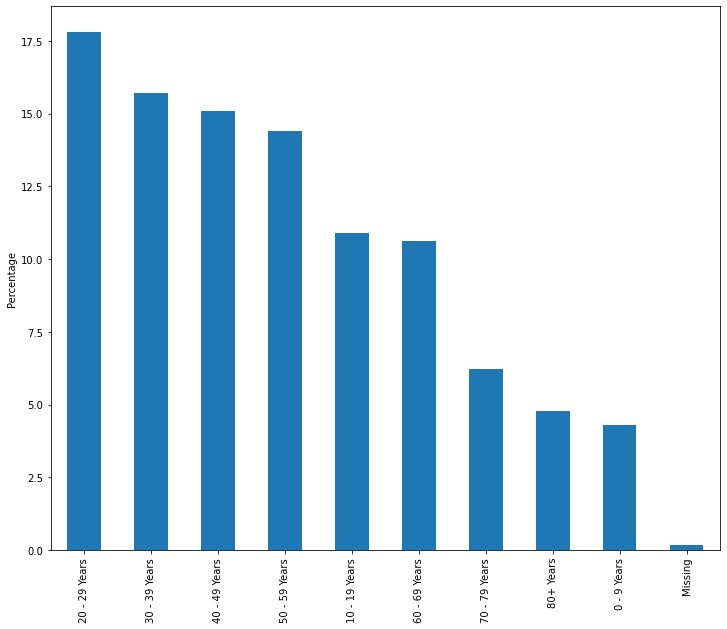

In [99]:
ageCaseRate.plot(kind='bar', figsize=(12,10), ylabel="Percentage")

In [100]:
ageDeathTotal = df[['age_group', 'death_yn']][(df['age_group'].notnull())]
ageDeathYes = df[['age_group', 'death_yn']][(df['death_yn'] == 'Yes') & (df['age_group'].notnull())]
ageDeathRate = (ageDeathYes['age_group'].value_counts()/ageDeathTotal['age_group'].value_counts()) * 100
ageDeathRate

0 - 9 Years       0.000000
10 - 19 Years     0.000000
20 - 29 Years     0.060386
30 - 39 Years     0.068399
40 - 49 Years     0.925267
50 - 59 Years     2.089552
60 - 69 Years     5.555556
70 - 79 Years    12.456747
80+ Years        35.360360
Missing           0.000000
Name: age_group, dtype: float64

Extrapolating on the prior case data by creating a categorical/categorical feature pair examination of *age_group* and *death_yn*, we can see a sharp inversion when compared to case data. While younger agults are the most likely to contract Covid19, they are extremely unlikely to die from it. This has been attributed to their strong immune systems by virtue of their young age. In contrast to this, the elderly often have weaker immune systems and thus have less ability to successfully fight off the virus. Therefore, while the young are more likely to contract Covid19, they are less likely to die from it, and vice versa.

<AxesSubplot:ylabel='Percentage'>

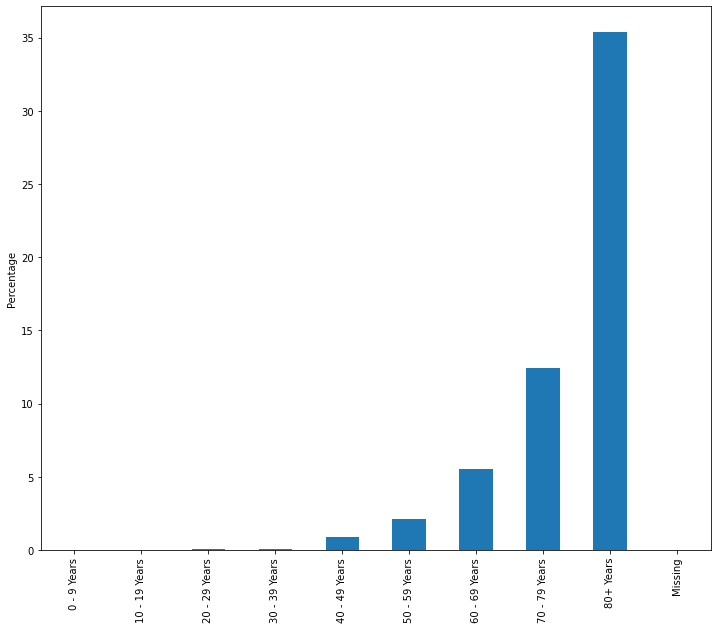

In [101]:
ageDeathRate.plot(kind='bar', figsize=(12,10), ylabel="Percentage")

The second feature pair I will examine is the number of cases (continuous) per ethnicity (categorical). This is valuable as it can help the CDC to evaluate which ethnicities are hit hardest by Covid19.

In [102]:
ethnicityCaseTotal = df[['race_ethnicity_combined']][(df['race_ethnicity_combined'].notnull())]
ethnicityCaseRate = (ethnicityCaseTotal['race_ethnicity_combined'].value_counts()/ethnicityCaseTotal['race_ethnicity_combined'].value_counts().sum()) * 100
ethnicityCaseRate

Missing                                                 37.929923
White, Non-Hispanic                                     35.199914
Hispanic/Latino                                         10.801806
Black, Non-Hispanic                                      7.448409
Multiple/Other, Non-Hispanic                             5.223560
Asian, Non-Hispanic                                      2.493551
American Indian/Alaska Native, Non-Hispanic              0.666380
Native Hawaiian/Other Pacific Islander, Non-Hispanic     0.236457
Name: race_ethnicity_combined, dtype: float64

While this data would need to be further compared to the racial/ethnic makeup of the overall population, in order to get these cases in proportion rather than absolute values, it can be said that about the same amount of white-non Hispanic cases are being reported when compared to all other racial/ethnic groups. Like I mentioned before, this data will need to be compared to the overall population under the CDC's jurisdiction in order to reveal if any race/ethnicity is getting infected proportionally more or less than the rest.

<AxesSubplot:ylabel='Percentage'>

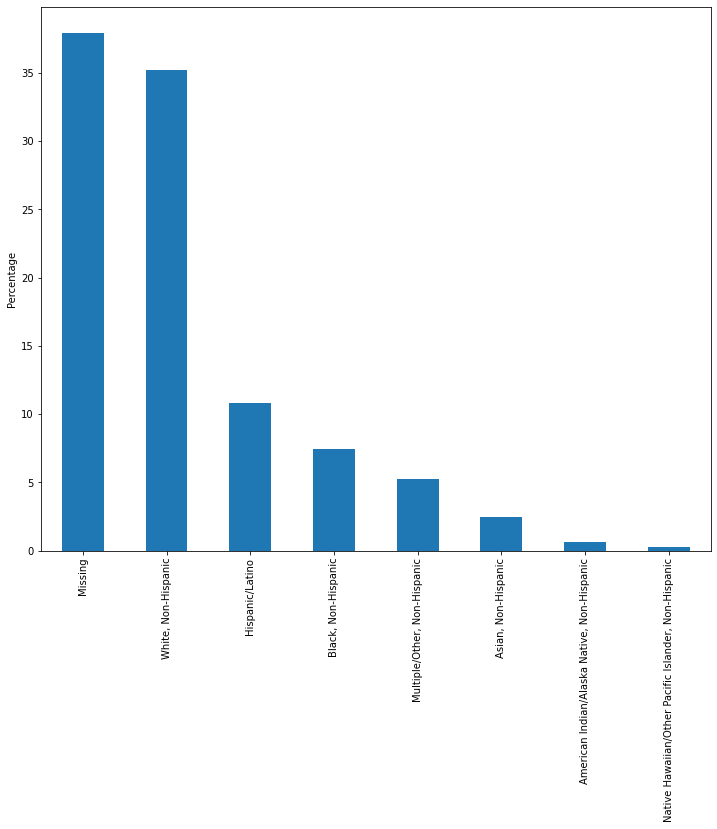

In [103]:
ethnicityCaseRate.plot(kind='bar', figsize=(12,10), ylabel="Percentage")

In [104]:
ethnicityDeathTotal = df[['race_ethnicity_combined', 'death_yn']][(df['race_ethnicity_combined'].notnull())]
ethnicityDeathYes = df[['race_ethnicity_combined', 'death_yn']][(df['death_yn'] == 'Yes') & (df['race_ethnicity_combined'].notnull())]
ethnicityDeathRate = (ethnicityDeathYes['race_ethnicity_combined'].value_counts()/ethnicityDeathTotal['race_ethnicity_combined'].value_counts()) * 100
ethnicityDeathRate

American Indian/Alaska Native, Non-Hispanic             6.451613
Asian, Non-Hispanic                                     5.603448
Black, Non-Hispanic                                     5.050505
Hispanic/Latino                                         3.383085
Missing                                                 1.870218
Multiple/Other, Non-Hispanic                            2.263374
Native Hawaiian/Other Pacific Islander, Non-Hispanic    0.000000
White, Non-Hispanic                                     5.007634
Name: race_ethnicity_combined, dtype: float64

However, extrapolating the prior racial/ethnic case data and comparing these case numbers to their likelihood of death, the data becomes much more valuable. A continuous/categorical feature pair examination of *death_yn* and *race_ethnicity_combined* can reveal the death rate of various ethnicities/races. While the data is rather limited for some ethnicities, it does show for example that the American Indian/Alaska Native, Non-Hispanic group are disproportionally more susceptible to death when they contract Covid19. On a surface level, this might be due to the lack of financial support for these groups, or perhaps the fact that many of these groups live in remote locations might play a part in this too.

<AxesSubplot:ylabel='Percentage'>

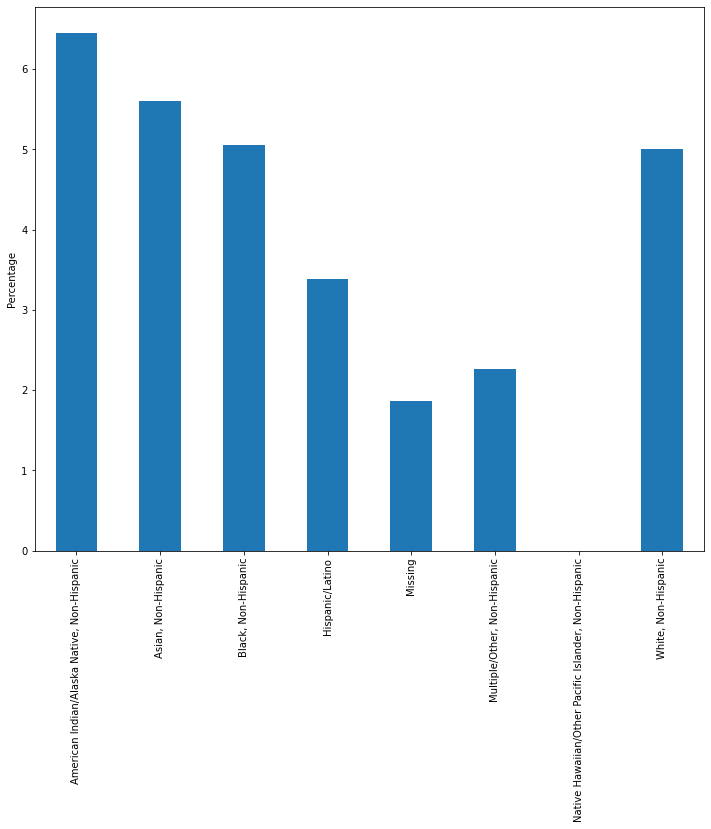

In [105]:
ethnicityDeathRate.plot(kind='bar', figsize=(12,10), ylabel="Percentage")

The third feature pair I will examine is the number of cases (continuous) per sex (categorical). This is valuable as it can help the CDC to evaluate which sex is hit hardest by Covid19.

In [106]:
sexCaseTotal = df[['sex']][(df['sex'].notnull())]
sexCaseRate = (sexCaseTotal['sex'].value_counts()/sexCaseTotal['sex'].value_counts().sum()) * 100
sexCaseRate

Female     51.612210
Male       47.366724
Missing     1.021066
Name: sex, dtype: float64

This case data is much more accessible than the prior racial/ethnic case data, as we know the makeup of sex for most populations is approximately 50/50. The above data shows that females are slightly more likely to contract Covid19, according to our data set. However, it must be noted that we would require a larger data set to see if the data still skews towards females, as the percentages are quite close (~52/~48).

<AxesSubplot:ylabel='Percentage'>

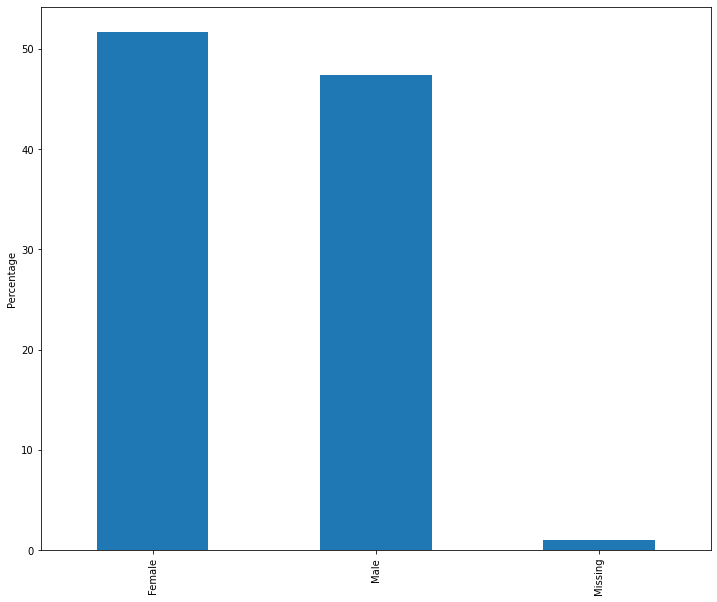

In [107]:
sexCaseRate.plot(kind='bar', figsize=(12,10), ylabel="Percentage")

In [108]:
sexDeathTotal = df[['sex', 'death_yn']][(df['sex'].notnull())]
sexDeathYes = df[['sex', 'death_yn']][(df['death_yn'] == 'Yes') & (df['sex'].notnull())]
sexDeathRate = (sexDeathYes['sex'].value_counts()/sexDeathTotal['sex'].value_counts()) * 100
sexDeathRate

Female     2.977926
Male       4.175176
Missing    0.000000
Name: sex, dtype: float64

Extrapolating upon the prior case data for males and females, a very interesting piece of data can be revealed. The above data shows that men are more likely to die from Covid19 if they contract the virus. This categorical feature pair (*death_yn/sex*) can provide invaluable data to the CDC in their fight against Covid19.

<AxesSubplot:ylabel='Percentage'>

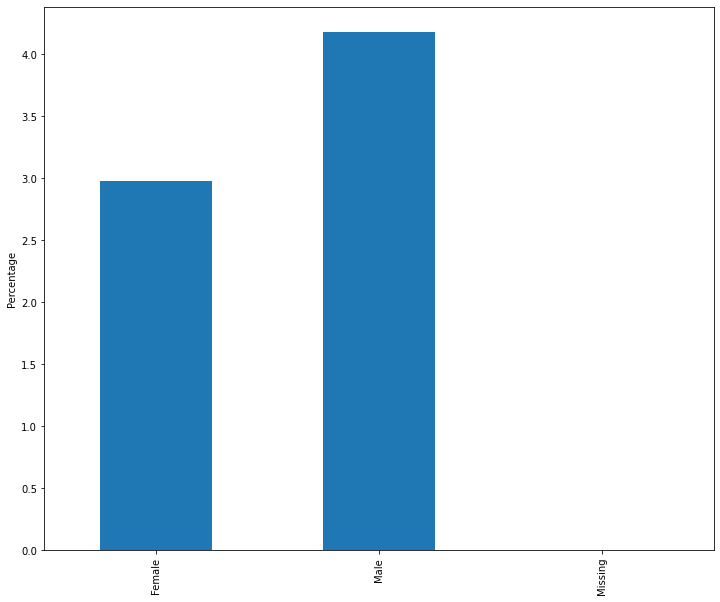

In [109]:
sexDeathRate.plot(kind='bar', figsize=(12,10), ylabel="Percentage")

# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

#### **New feature 1** 
- The first new feature, *weekday_name*, is derived from *cdc_case_earliest_dt*.
- This can assist the CDC in analysing what days of the week most cases are reported, thus allowing them to predict weekly trends of infection more reliably.

In [110]:
start = datetime.datetime(2020, 1, 1)
df['weekday_name'] = start + df['cdc_case_earliest_dt'].map(datetime.timedelta)
df['weekday_name'].astype('datetime64')
df['weekday_name'] = df['weekday_name'].dt.day_name()
df['weekday_name'].astype('category')

df

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,weekday_name
0,343,343,343,Laboratory-confirmed case,Male,30 - 39 Years,Missing,No,Missing,No,Missing,Wednesday
1,147,147,147,Laboratory-confirmed case,Male,30 - 39 Years,Missing,No,Missing,No,Missing,Wednesday
2,327,327,327,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,Missing,Monday
3,238,238,238,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing,Wednesday
4,283,283,283,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,No,Yes,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,181,181,181,Laboratory-confirmed case,Female,80+ Years,Missing,Missing,Missing,No,Missing,Tuesday
9995,76,77,76,Laboratory-confirmed case,Male,30 - 39 Years,Missing,No,Missing,No,No,Tuesday
9997,111,109,111,Laboratory-confirmed case,Male,60 - 69 Years,Missing,No,Missing,No,Missing,Tuesday
9998,91,91,91,Laboratory-confirmed case,Male,60 - 69 Years,Missing,No,Missing,No,Yes,Wednesday


- It can also help with analysis regarding the reporting process itself. The question that immediately arises here is the distinct lack of reporting over the weekends.
- On a face level, there are a number of possible reasons that can be implied from this. For example, perhaps those who report cases are understaffed on weekends. Another reason might be that people are less likely to get tested on weekends since they would rather enjoy their weekend and get tested on Monday (where there is a spike).
- This feature can also be used in conjunction with other categorical data. For example, a question might be: *Do working age people get tested more during the week since they can take that time off work to get tested?*

<AxesSubplot:>

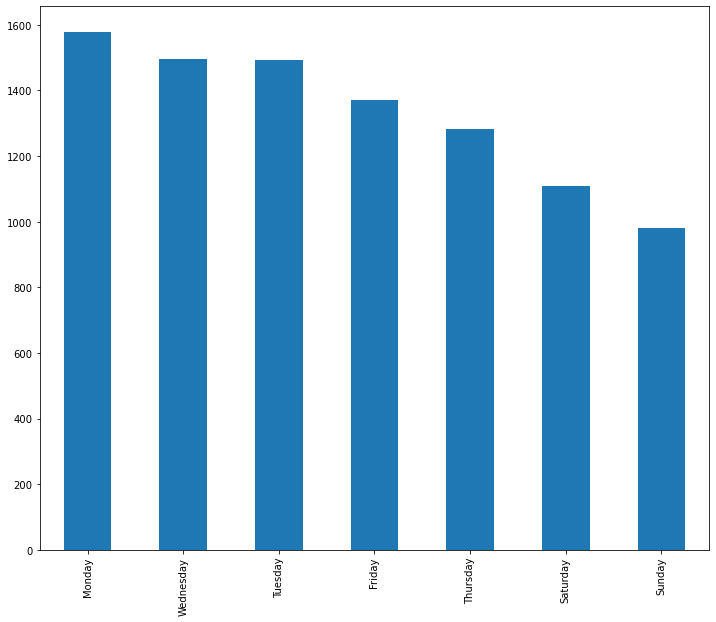

In [111]:
df['weekday_name'].value_counts().plot(kind='bar', figsize=(12,10))

- It can also help with analysis regarding the reporting process itself. The question that immediately arises here is the distinct lack of reporting over the weekends.
- On a face level, there are a number of possible reasons that can be implied from this. For example, perhaps those who report cases are understaffed on weekends. Another reason might be that people are less likely to get tested on weekends since they would rather enjoy their weekend and get tested on Monday (where there is a spike).
- As a result, we can make assumptions that people who contract the virus over the weekend do not have their cases reported as quickly. This can directly help in our analysis of our problem domain *(death_yn)*, as those who do not test positive as quickly do not get early treatment, thus making their chance of death higher.
- This feature can also be used in conjunction with other categorical data. For example, a question might be: *Do working age people get tested more during the week since they can take that time off work to get tested?*

#### **New feature 2** 
- The second new feature, *month*, is derived from *cdc_case_earliest_dt*.
- This can assist the CDC in analysing what time of year cases are highest, thus allowing them to prepare for future waves and minimise hospital overcrowding and thus death.

In [112]:
df['month'] = start + df['cdc_case_earliest_dt'].map(datetime.timedelta)
df['month'].astype('datetime64')
df['month'] = df['month'].dt.month_name()
df['month'].astype('category')
df

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,weekday_name,month
0,343,343,343,Laboratory-confirmed case,Male,30 - 39 Years,Missing,No,Missing,No,Missing,Wednesday,December
1,147,147,147,Laboratory-confirmed case,Male,30 - 39 Years,Missing,No,Missing,No,Missing,Wednesday,May
2,327,327,327,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,Missing,Monday,November
3,238,238,238,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing,Wednesday,August
4,283,283,283,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,No,Yes,Saturday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,181,181,181,Laboratory-confirmed case,Female,80+ Years,Missing,Missing,Missing,No,Missing,Tuesday,June
9995,76,77,76,Laboratory-confirmed case,Male,30 - 39 Years,Missing,No,Missing,No,No,Tuesday,March
9997,111,109,111,Laboratory-confirmed case,Male,60 - 69 Years,Missing,No,Missing,No,Missing,Tuesday,April
9998,91,91,91,Laboratory-confirmed case,Male,60 - 69 Years,Missing,No,Missing,No,Yes,Wednesday,April


- Although months can be placed in order, the data is categorical as there is a finite number of months.
- This feature can help to address and predict the problem domain *(death_yn)*, as we now have the ability to examine if particular months of the year yield a more deadly virus. A common perception as of now is that Covid19 is both more infectious and deadly during winter due to the cold weather lowering immune systems. This feature can successfully predict and graph this information. 
- This feature can also be used in conjunction with other categorical data. For example, a question might be: *Do more young people get infected during the summer months than older people?*

<AxesSubplot:>

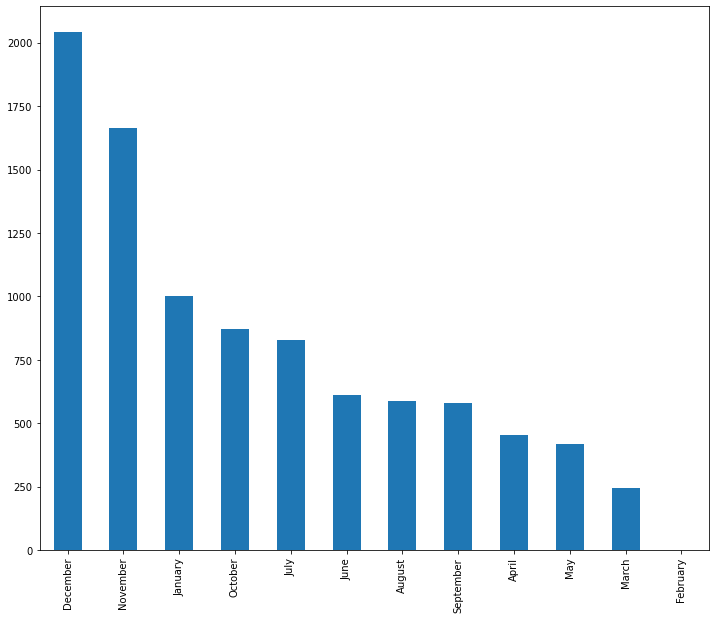

In [113]:
df['month'].value_counts().plot(kind='bar', figsize=(12,10))

#### **New feature 3** 
- The third new feature, *high_risk*, is derived from *age_group* and *medcond_yn*.
- This can assist the CDC in analysing how many people who are at high risk of being committed to the ICU/hospitalised.
- However, its function is to gauge which demographics are at the highest risk of death. This feature can identify those who are most likely to fall under our problem domain *(death_yn)*, thus predicting (and perhaps preventing) deaths.

In [114]:
df['high_risk'] = np.where((df['age_group'] == "80+ Years") | (df['medcond_yn'] == "Yes"), "Yes", "No")

- This data can help hospitals prepare extra provisions if many individuals who are categorised as *high_risk* test positive in a short period of time.
- It can also help the CDC define exactly what *high_risk* entails. For example, should the age be lowered to capture more people?
- This feature can also be used in conjunction with other categorical data. For example, a question might be: *Do certain ethnicities have proportionally more high risk people testing positive?*
- Another useful metric would be to compare *high_risk* to *death_yn* as a ratio to get an idea of the death rate for high risk individuals in comparison to the rest of the population.

<AxesSubplot:>

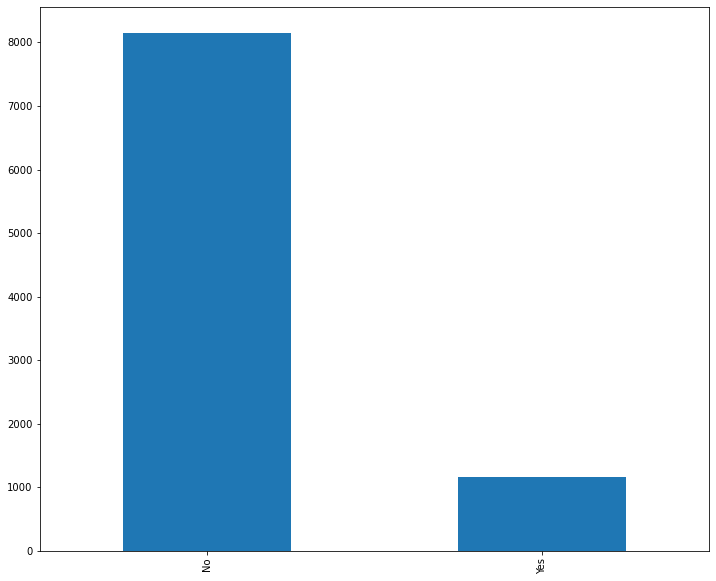

In [115]:
df['high_risk'].value_counts().plot(kind='bar', figsize=(12,10))

Before converting to our final csv, it is important to convert our new features to categorical data types.

In [116]:
object_columns = df.select_dtypes(['object']).columns

for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

cdc_case_earliest_dt          int64
pos_spec_dt                   int64
onset_dt                      int64
current_status             category
sex                        category
age_group                  category
race_ethnicity_combined    category
hosp_yn                    category
icu_yn                     category
death_yn                   category
medcond_yn                 category
weekday_name               category
month                      category
high_risk                  category
dtype: object

In [117]:
# Write the dataframe to a csv file
df.to_csv('covid19-cdc_cleaned_added.csv')